In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from drawarrow import fig_arrow, ax_arrow

In [2]:
historic_station_met = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-10-21/historic_station_met.csv")

In [3]:
historic_station_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39148 entries, 0 to 39147
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  39148 non-null  object 
 1   year     39148 non-null  int64  
 2   month    39148 non-null  int64  
 3   tmax     38220 non-null  float64
 4   tmin     38246 non-null  float64
 5   af       36821 non-null  float64
 6   rain     38275 non-null  float64
 7   sun      29980 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.4+ MB


In [4]:
historic_station_met.head(2)

,station,year,month,tmax,tmin,af,rain,sun
0,aberporth,1941,1,NaN,NaN,NaN,74.7,NaN
1,aberporth,1941,2,NaN,NaN,NaN,69.1,NaN


In [5]:
historic_station_met = historic_station_met[historic_station_met["year"]>1889].reset_index().drop("index", axis=1)

In [6]:
# Yearly data with averages
year_df = historic_station_met.groupby("year")[["tmax", "tmin", "af", "rain", "sun"]].mean().reset_index()

In [7]:
# Averages 
avg_tmax = year_df["tmax"].mean()
avg_tmin = year_df["tmin"].mean()
avg_af = year_df["af"].mean()
avg_rain = year_df["rain"].mean()
avg_sun = year_df["sun"].mean()

In [8]:
# Calulate anomalies
year_df["tmax_anomaly"] = year_df["tmax"] - avg_tmax 
year_df["tmin_anomaly"] = year_df["tmin"] - avg_tmin
year_df["af_anomaly"] = year_df["af"] - avg_af
year_df["rain_anomaly"] = year_df["rain"] - avg_rain
year_df["sun_anomaly"] = year_df["sun"] - avg_sun

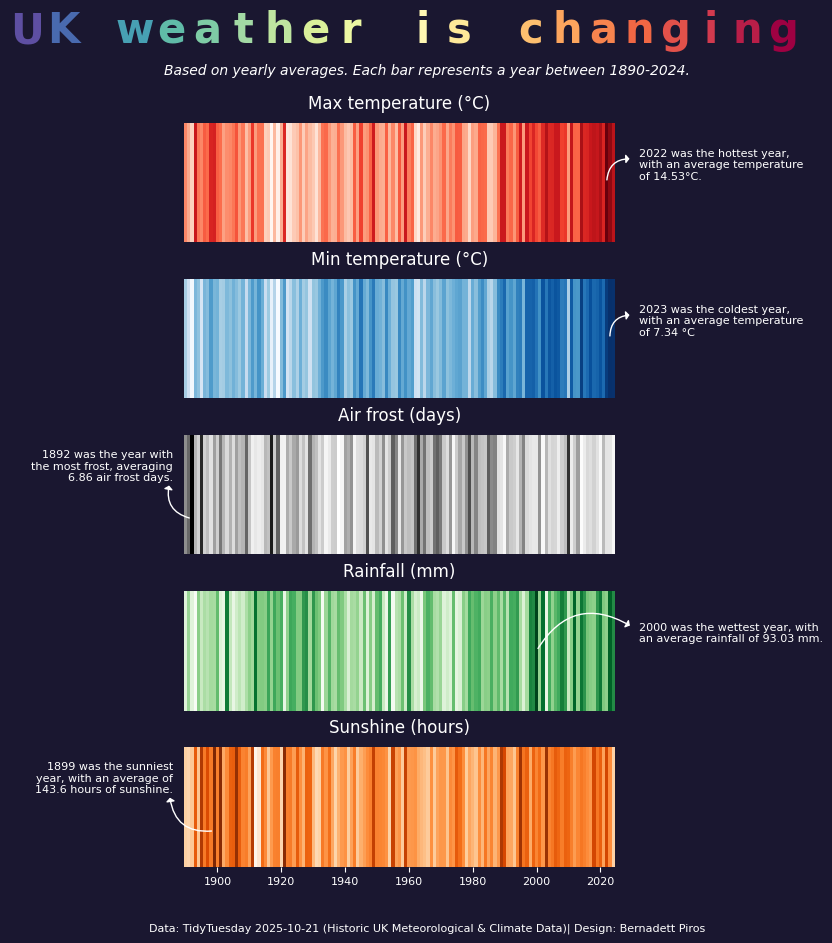

In [9]:
# List of columns, titles and colormaps
columns = ["tmax_anomaly", "tmin_anomaly", "af_anomaly", "rain_anomaly", "sun_anomaly"]
titles = ["Max temperature (°C)", "Min temperature (°C)", "Air frost (days)", "Rainfall (mm)", "Sunshine (hours)"]
colormaps = ["Reds", "Blues", "Greys", "managua", "Wistia"]  

# Loop over the columns and create barcode charts with titles
fig, axes = plt.subplots(len(columns), 1, figsize=(8, 8), sharex=True, layout="constrained", facecolor="#1a1730")

for i, (column, title) in enumerate(zip(columns, titles)):
    ax = axes[i]
    
    # Normalize values for color 
    if column == "tmax_anomaly":
        norm = plt.Normalize(year_df[column].min(), year_df[column].max())
        cmap = plt.cm.Reds
    elif column == "tmin_anomaly":
        norm = plt.Normalize(year_df[column].min(), year_df[column].max())
        cmap = plt.cm.Blues
    elif column == "af_anomaly":
        norm = plt.Normalize(year_df[column].min(), year_df[column].max())
        cmap = plt.cm.Greys
    elif column == "rain_anomaly":
        norm = plt.Normalize(year_df[column].min(), year_df[column].max())
        cmap = plt.cm.Greens      
    else:  
        norm = plt.Normalize(year_df[column].min(), year_df[column].max())
        cmap = plt.cm.Oranges

    # Apply colormap to the values
    colors = cmap(norm(year_df[column]))  

    ax.bar(year_df["year"], 1, color=colors, width=1)
    ax.set_title(f'{title}', color="white")    
    ax.axis("off")

# Turn on the axis for the last subplot
axes[4].axis("on")  
axes[4].tick_params(axis="x", labelcolor="white", labelsize=8, color="white")
axes[4].spines[["top", "right", "left", "bottom"]].set_visible(False)
axes[4].set_yticks([])
axes[4].set_facecolor("#1a1730")

# Arrows and text annotations
ax_arrow(
   tail_position=(2022, 0.5),
   head_position=(2030, 0.7),
   color="white",   
   width=1,
   head_width=2.5,
   head_length=2,
   radius=-0.5,
   ax=axes[0]
)

axes[0].text(2032, 0.65, "2022 was the hottest year,\nwith an average temperature\nof 14.53°C.", size=8, color="white", ha="left", va="center")

ax_arrow(
   tail_position=(2023, 0.5),
   head_position=(2030, 0.7),
   color="white",   
   width=1,
   head_width=2.5,
   head_length=2,
   radius=-0.5,
   ax=axes[1]
)

axes[1].text(2032, 0.65, "2023 was the coldest year,\nwith an average temperature\nof 7.34 °C", size=8, color="white", ha="left", va="center")

ax_arrow(
   tail_position=(1892, 0.3),
   head_position=(1885, 0.6),
   color="white",  
   width=1,
   head_width=2.5,
   head_length=2,
   radius=-0.5,
   ax=axes[2]
)

axes[2].text(1886, 0.6, "1892 was the year with\nthe most frost, averaging\n6.86 air frost days.", size=8, color="white", ha="right", va="bottom")

ax_arrow(
   tail_position=(2000, 0.5),
   head_position=(2030, 0.7),
   color="white",   
   width=1,
   head_width=2.5,
   head_length=2,
   radius=-0.5,
   ax=axes[3]
)

axes[3].text(2032, 0.65, "2000 was the wettest year, with\nan average rainfall of 93.03 mm.", size=8, color="white", ha="left", va="center")

ax_arrow(
   tail_position=(1899, 0.3),
   head_position=(1885, 0.6),
   color="white",   
   width=1,
   head_width=2.5,
   head_length=2,
   radius=-0.5,
   ax=axes[4]
)

axes[4].text(1886, 0.6, "1899 was the sunniest\nyear, with an average of\n143.6 hours of sunshine.", size=8, color="white", ha="right", va="bottom")

fig.text(0.5, 1.02, "Based on yearly averages. Each bar represents a year between 1890-2024.", color="white", style="italic", ha="center")

# Add inset ax for the main title
inset_ax = fig.add_axes([0, 0.98, 0.9, 0.1])
# Title to add
txt = "UK weather is changing"
# Use the Spectral colormap
cmap = plt.cm.Spectral_r
# Normalize over the length of the text
norm = plt.Normalize(0, len(txt)-1)  
# Adjust the spacing between characters
spacing = 0.05  

# Loop through each character and assign a color
for i, char in enumerate(txt):
    inset_ax.text(i * spacing, 0.95, char, fontsize=30, color=cmap(norm(i)),  weight="bold", ha="center", va="center")

inset_ax.axis("off")

# Caption
fig.text(0.5, -0.05, "Data: TidyTuesday 2025-10-21 (Historic UK Meteorological & Climate Data)| Design: Bernadett Piros", size=8, color="white", ha="center")

plt.show()

#fig.savefig("2025-10-21.png", bbox_inches='tight', dpi=300,  pad_inches=0.2)